# intro
the purpose of this notebook is to evaluate rlib agent on a dataset.
each section will handle a different env

## common imports

In [4]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:90% !important; }</style>'))

In [5]:
import os
import sys
rlib_root_path = os.path.abspath('../..')
if rlib_root_path not in sys.path:
    print('inserting the following to path',rlib_root_path)
    sys.path.insert(0,os.path.abspath('..'))
    print(sys.path)

inserting the following to path /home/gkoren2/PycharmProjects/remote/MLA/RL/ray
['/home/gkoren2/PycharmProjects/remote/MLA/RL/ray/my_scripts', '/home/gkoren2/PycharmProjects/remote/MLA/RL/ray/my_scripts/notebooks', '/opt/anaconda3/envs/rlib20/lib/python37.zip', '/opt/anaconda3/envs/rlib20/lib/python3.7', '/opt/anaconda3/envs/rlib20/lib/python3.7/lib-dynload', '', '/opt/anaconda3/envs/rlib20/lib/python3.7/site-packages', '/opt/anaconda3/envs/rlib20/lib/python3.7/site-packages/IPython/extensions', '/home/gkoren2/.ipython']


In [6]:
import pandas as pd
import tensorflow as tf
import ray
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from ray.rllib.agents.registry import get_agent_class
from ray.tune.registry import register_env
ray.init()

2020-04-16 10:39:44,623	INFO resource_spec.py:212 -- Starting Ray with 18.07 GiB memory available for workers and up to 9.05 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-04-16 10:39:45,020	INFO services.py:1120 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '10.189.1.216',
 'redis_address': '10.189.1.216:57810',
 'object_store_address': '/tmp/ray/session_2020-04-16_10-39-44_622290_22614/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-04-16_10-39-44_622290_22614/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-04-16_10-39-44_622290_22614'}

# L2P

In [23]:
from sandbox.my_custom_envs import L2PEnv,L2PEnv_def_cfg
register_env("L2P-v0", lambda config: L2PEnv(config))

## Loading the test set

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# load the file as you get it from Michal 
data_path=os.path.join(os.path.expanduser('~'),'share/Data/MLA/L2P')
# input_file = os.path.join(data_path,'michal','L2_data_random_for_RL_Batch.csv')     # 1st trial
input_file = os.path.join(data_path,'michal','Batch_RL_2nd_trial','for_inference','data_set_0_batch_RL_for_inference.csv')     # 2nd trial
df=pd.read_csv(input_file,index_col=0)
df.head(10)

,trace,trace_phase,group_id,ipc_for_reward,ipc,stall_l2m,stall_l1m,sq_occupancy,l2_prefetch_alloc,l2_useless_prefetch,l2_hit
0,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.381840,147.0,0.0,2.0,2.0,6.0,0.0,7.0
1,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.388933,148.0,0.0,2.0,2.0,5.0,0.0,7.0
2,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.373650,147.0,0.0,2.0,1.0,4.0,0.0,7.0
3,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_200000,0,4.401007,148.0,1.0,3.0,1.0,3.0,0.0,7.0
4,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_400000,1,4.626786,156.0,0.0,0.0,0.0,2.0,0.0,5.0
5,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_400000,1,4.704997,159.0,0.0,0.0,0.0,2.0,0.0,5.0
6,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_400000,1,4.607739,155.0,0.0,0.0,0.0,2.0,0.0,5.0
7,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_400000,1,4.680705,158.0,0.0,0.0,0.0,1.0,0.0,4.0
8,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_600000,2,4.093309,137.0,8.0,11.0,4.0,11.0,0.0,17.0
9,3d_raytrace_chakra_002_02,3d_raytrace_chakra_002_02_600000,2,4.057422,136.0,8.0,10.0,4.0,11.0,0.0,18.0


In [12]:
STATE_COLS = ['ipc', 'stall_l2m', 'stall_l1m', 'sq_occupancy', 'l2_prefetch_alloc', 'l2_useless_prefetch', 'l2_hit']
# Leakage : we need to use the scaling data from the training set. here we're shortcutting by fitting to test set
scaler = MinMaxScaler()
# scaler.fit(training_Set_data)
# scaler.transform(df[STATE_COLS])
X = scaler.fit_transform(df[STATE_COLS])
X.shape

(397908, 7)

## load the model

In [24]:
path_to_trial_results='/home/gkoren2/ray_results/contrib/DBCQ/contrib_DBCQ_L2P-v0_0_2020-04-14_10-32-18eej7fsqy'
cls=get_agent_class("contrib/DBCQ")
with open(os.path.join(path_to_trial_results,'params.pkl'),"rb") as f:
     config=pickle.load(f)
agent=cls(env=config['env'],config=config)
agent.restore(os.path.join(path_to_trial_results,'checkpoint_34604/checkpoint-34604'))
policy=agent.get_policy()
print(policy.model.base_model.summary())
y_pred_g02 = policy.compute_actions(X,explore=False)[0]

2020-04-16 10:49:03,987	WARNING json_reader.py:47 -- Treating input directory as glob pattern: /home/gkoren2/share/Data/MLA/L2P/michal/Batch_RL_2nd_trial/for_training/RL_trial2_exp_base_scale/*.json
2020-04-16 10:49:03,991	INFO trainable.py:217 -- Getting current IP.
2020-04-16 10:49:03,992	WARNING util.py:37 -- Install gputil for GPU system monitoring.
2020-04-16 10:49:04,037	INFO trainable.py:217 -- Getting current IP.
2020-04-16 10:49:04,038	INFO trainable.py:423 -- Restored on 10.189.1.216 from checkpoint: /home/gkoren2/ray_results/contrib/DBCQ/contrib_DBCQ_L2P-v0_0_2020-04-14_10-32-18eej7fsqy/checkpoint_34604/checkpoint-34604
2020-04-16 10:49:04,040	INFO trainable.py:430 -- Current state after restoring: {'_iteration': 34604, '_timesteps_total': 60000091, '_time_total': 35021.98146510124, '_episodes_total': 0}


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observations (InputLayer)       [(None, 7)]          0                                            
__________________________________________________________________________________________________
fc_1 (Dense)                    (None, 256)          2048        observations[0][0]               
__________________________________________________________________________________________________
fc_out (Dense)                  (None, 256)          65792       fc_1[0][0]                       
__________________________________________________________________________________________________
value_out (Dense)               (None, 1)            257         fc_1[0][0]                       
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
________________________

In [28]:
path_to_trial_results='/home/gkoren2/ray_results/contrib/DBCQ/contrib_DBCQ_L2P-v0_0_2020-04-14_10-44-183kmofif0'
cls=get_agent_class("contrib/DBCQ")
with open(os.path.join(path_to_trial_results,'params.pkl'),"rb") as f:
     config=pickle.load(f)
agent=cls(env=config['env'],config=config)
agent.restore(os.path.join(path_to_trial_results,'checkpoint_34688/checkpoint-34688'))
policy=agent.get_policy()
print(policy.model.base_model.summary())
y_pred_g05 = policy.compute_actions(X,explore=False)[0]

2020-04-16 10:51:41,739	WARNING json_reader.py:47 -- Treating input directory as glob pattern: /home/gkoren2/share/Data/MLA/L2P/michal/Batch_RL_2nd_trial/for_training/RL_trial2_exp_base_scale/*.json
2020-04-16 10:51:41,740	INFO trainable.py:217 -- Getting current IP.
2020-04-16 10:51:41,742	WARNING util.py:37 -- Install gputil for GPU system monitoring.
2020-04-16 10:51:41,786	INFO trainable.py:217 -- Getting current IP.
2020-04-16 10:51:41,788	INFO trainable.py:423 -- Restored on 10.189.1.216 from checkpoint: /home/gkoren2/ray_results/contrib/DBCQ/contrib_DBCQ_L2P-v0_0_2020-04-14_10-44-183kmofif0/checkpoint_34688/checkpoint-34688
2020-04-16 10:51:41,788	INFO trainable.py:430 -- Current state after restoring: {'_iteration': 34688, '_timesteps_total': 60001497, '_time_total': 35109.93586349487, '_episodes_total': 0}


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observations (InputLayer)       [(None, 7)]          0                                            
__________________________________________________________________________________________________
fc_1 (Dense)                    (None, 256)          2048        observations[0][0]               
__________________________________________________________________________________________________
fc_out (Dense)                  (None, 256)          65792       fc_1[0][0]                       
__________________________________________________________________________________________________
value_out (Dense)               (None, 1)            257         fc_1[0][0]                       
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
________________________

In [31]:
path_to_trial_results='/home/gkoren2/ray_results/contrib/DBCQ/contrib_DBCQ_L2P-v0_0_2020-04-14_10-45-194l8po767'
cls=get_agent_class("contrib/DBCQ")
with open(os.path.join(path_to_trial_results,'params.pkl'),"rb") as f:
     config=pickle.load(f)
agent=cls(env=config['env'],config=config)
agent.restore(os.path.join(path_to_trial_results,'checkpoint_34715/checkpoint-34715'))
policy=agent.get_policy()
print(policy.model.base_model.summary())
y_pred_g09 = policy.compute_actions(X,explore=False)[0]

2020-04-16 10:52:21,679	WARNING json_reader.py:47 -- Treating input directory as glob pattern: /home/gkoren2/share/Data/MLA/L2P/michal/Batch_RL_2nd_trial/for_training/RL_trial2_exp_base_scale/*.json
2020-04-16 10:52:21,680	INFO trainable.py:217 -- Getting current IP.
2020-04-16 10:52:21,682	WARNING util.py:37 -- Install gputil for GPU system monitoring.
2020-04-16 10:52:21,724	INFO trainable.py:217 -- Getting current IP.
2020-04-16 10:52:21,726	INFO trainable.py:423 -- Restored on 10.189.1.216 from checkpoint: /home/gkoren2/ray_results/contrib/DBCQ/contrib_DBCQ_L2P-v0_0_2020-04-14_10-45-194l8po767/checkpoint_34715/checkpoint-34715
2020-04-16 10:52:21,727	INFO trainable.py:430 -- Current state after restoring: {'_iteration': 34715, '_timesteps_total': 60000223, '_time_total': 35135.981666088104, '_episodes_total': 0}


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
observations (InputLayer)       [(None, 7)]          0                                            
__________________________________________________________________________________________________
fc_1 (Dense)                    (None, 256)          2048        observations[0][0]               
__________________________________________________________________________________________________
fc_out (Dense)                  (None, 256)          65792       fc_1[0][0]                       
__________________________________________________________________________________________________
value_out (Dense)               (None, 1)            257         fc_1[0][0]                       
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
________________________

<IPython.core.display.Javascript object>


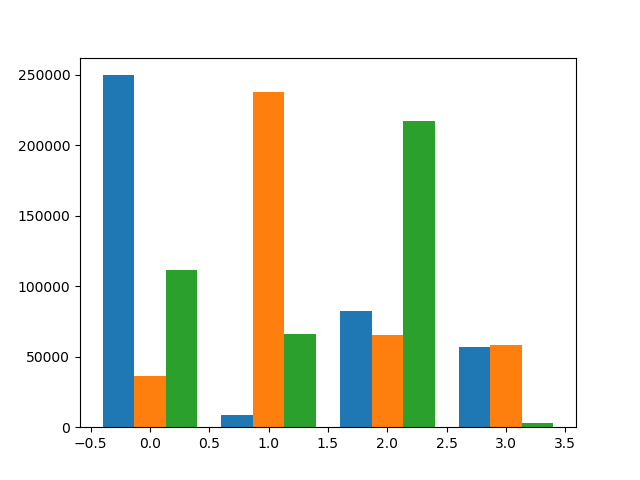

In [35]:
# if repeated the above for g02,g05,g09 , you can now combine all results
y_pred=np.concatenate([y_pred_g02[:,None],y_pred_g05[:,None],y_pred_g09[:,None]],axis=1)
plt.hist(y_pred,bins=[b+0.5 for b in range(-1,4)])
plt.show()

In [36]:
df['rl_pred_02']=y_pred_g02
df['rl_pred_05']=y_pred_g05
df['rl_pred_09']=y_pred_g09

In [37]:
output_file=os.path.splitext(input_file)[0]+'_RLpred_rllib_DBCQ.csv'
print("saving to "+output_file)
df.to_csv(output_file)

saving to /home/gkoren2/share/Data/MLA/L2P/michal/Batch_RL_2nd_trial/for_inference/data_set_0_batch_RL_for_inference_RLpred_rllib_DBCQ.csv
